In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import losses
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import generator

In [2]:
def generate_dataset():
    gen = generator.Generator(path_s="data/initial kernels/Kernel_Carbon_Adsorption.npy",
                        path_d="data/initial kernels/Kernel_Carbon_Desorption.npy",
                        path_p_d="data/initial kernels/Pressure_Carbon.npy",
                        path_p_s="data/initial kernels/Pressure_Carbon.npy",
                        path_a="data/initial kernels/Size_Kernel_Carbon_Adsorption.npy"
                )
    gen.generate_data_set()

def show_dataset():
    with open('data/datasets/carbon1.npy', 'rb') as f:
        dataset = np.load(f, allow_pickle=True)
        # i = 8
        # plt.plot(dataset[i]["isotherm"], marker=".")
        # plt.plot(dataset[i]["pore_distribution"], marker=".")
        # plt.show()
        # print(len(dataset))


In [3]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss', marker=".")
    #plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [138]:
x = []
y = []
min_exp_pressure_i = 48
max_exp_pressure_i = 546
with open('data/datasets/carbon2.npy', 'rb') as f:
        dataset = np.load(f, allow_pickle=True)
for i in range(len(dataset)):
    isotherm = dataset[i]["isotherm"] / max(dataset[i]["isotherm"])
    pore_distribution = dataset[i]["pore_distribution"] / max(dataset[i]["pore_distribution"])
    isotherm = isotherm[min_exp_pressure_i:max_exp_pressure_i]
    x.append(isotherm)
    y.append(pore_distribution)
x, y = shuffle(x, y)

In [139]:
print(len(y[0]), len(x[0]))

130 498


In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [141]:
model = keras.Sequential(
    [
        keras.Input(shape=len(x_train[0], )),
        layers.Dense(400, activation='relu'),
        layers.Dense(300, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(len(y_train[0]))
    ]
)

In [142]:
model.compile(loss='mean_squared_error', optimizer='Adam')

Epoch 1/300
21/21 [==============================] - 1s 4ms/step - loss: 0.1189
Epoch 2/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0685
Epoch 3/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0522
Epoch 4/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0450
Epoch 5/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0408
Epoch 6/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0375
Epoch 7/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0353
Epoch 8/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0336
Epoch 9/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0348
Epoch 10/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0307
Epoch 11/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0301
Epoch 12/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0297
Epoch 13/300
21/21 [=================

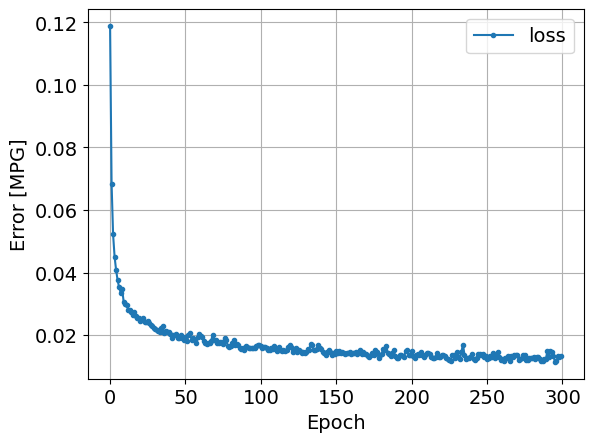

In [143]:
history = model.fit(np.array(x_train), np.array(y_train), epochs=300, batch_size=100, shuffle=True)
plot_loss(history)

In [144]:
prediction = model.predict(np.array(x_train))
print("prediction shape:", prediction.shape)

66/66 [==============================] - 0s 2ms/step
prediction shape: (2093, 130)


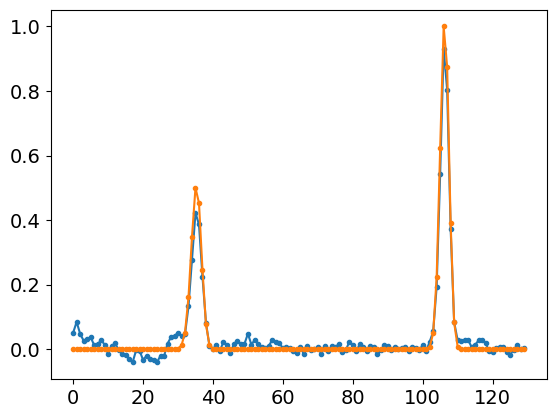

In [147]:
i = np.random.randint(0, 2000)
plt.plot(prediction[i], marker=".")
plt.plot(y_train[i], marker=".")
plt.show()

In [148]:
model.save('data/models/carbon2.keras')